In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file

In [370]:
df = pd.read_csv("adult_eda.csv")

# Try to undersstand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  

In [371]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [372]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [373]:
df.shape

(32561, 15)

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [375]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,31759.0,10.082843,2.576172,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [376]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [377]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [378]:
df.describe(include="object")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [379]:
#look at workclass column here
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [380]:
df[df["workclass"] == "?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4.0,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10.0,Never-married,?,NaN,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6.0,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6.0,Never-married,?,NaN,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13.0,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13.0,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9.0,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [381]:
df["workclass"]=df["workclass"].replace("?","Unknown")


In [382]:
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [383]:
#replace all '?' in whole df with 'Unknown'
df.replace("?","Unknown",inplace=True)

In [384]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


---
---

# Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [385]:
df["education"]

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

In [386]:
df["education-num"]

0        13.0
1        13.0
2         9.0
3         7.0
4        13.0
         ... 
32556    12.0
32557     9.0
32558     9.0
32559     9.0
32560     9.0
Name: education-num, Length: 32561, dtype: float64

In [387]:
df[["education","education-num"]].value_counts()

education     education-num
HS-grad       9.0              10215
Some-college  10.0              7098
Bachelors     13.0              5247
Masters       14.0              1687
Assoc-voc     11.0              1343
11th          7.0               1146
Assoc-acdm    12.0              1044
10th          6.0                916
7th-8th       4.0                631
Prof-school   15.0               559
9th           5.0                503
12th          8.0                424
Doctorate     16.0               405
5th-6th       3.0                330
1st-4th       2.0                161
Preschool     1.0                 50
dtype: int64

In [388]:
df["education-num"].value_counts()

9.0     10215
10.0     7098
13.0     5247
14.0     1687
11.0     1343
7.0      1146
12.0     1044
6.0       916
4.0       631
15.0      559
5.0       503
8.0       424
16.0      405
3.0       330
2.0       161
1.0        50
Name: education-num, dtype: int64

In [389]:
#drop one of them here
df.drop("education-num",axis=1,inplace=True)

In [390]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [391]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000


In [392]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [393]:
#age column
Q1=df.age.quantile(0.25)
Q3=df.age.quantile(0.75)
IQR = Q3-Q1

In [394]:
IQR

20.0

In [395]:
upper_lim= Q3 + IQR*1.5
upper_lim

78.0

In [396]:
df[df["age"] >=  upper_lim ]["age"].value_counts()

90    43
78    23
79    22
80    22
81    20
82    12
84    10
83     6
85     3
88     3
86     1
87     1
Name: age, dtype: int64

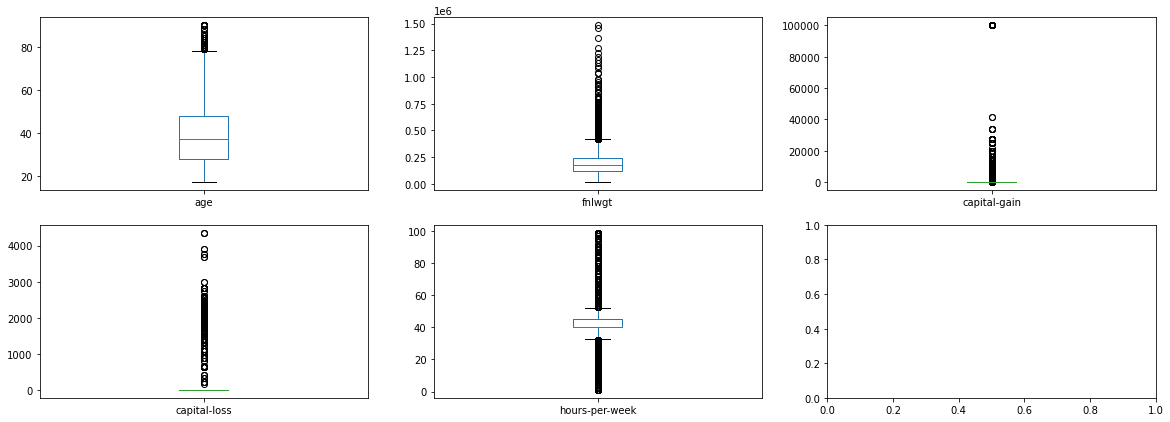

In [397]:
fig ,ax = plt.subplots(2,3,figsize=(20,7))
x = 0
y = 0
for column in df.select_dtypes('number').columns:
    
    df[column].plot(kind = "box", ax = ax[x,y])
    if y < 2:
        y += 1
    else:
        x += 1
        y = 0

In [398]:
df[(df["hours-per-week"] == 99)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
935,37,Private,176900,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,>50K
1172,25,Private,404616,Masters,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,>50K
1887,55,Self-emp-not-inc,184425,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,>50K
3578,37,Self-emp-inc,382802,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,99,United-States,>50K
4086,50,Unknown,174964,10th,Married-civ-spouse,Unknown,Husband,White,Male,0,0,99,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30992,40,Self-emp-inc,104235,Masters,Never-married,Other-service,NaN,White,Male,0,0,99,United-States,<=50K
31681,43,Private,266324,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K
31699,43,Self-emp-not-inc,163108,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
32469,58,Self-emp-inc,181974,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,Unknown,<=50K


In [399]:
#hours per week column
Q1=df["hours-per-week"].quantile(0.25)
Q3=df["hours-per-week"].quantile(0.75)
IQR = Q3-Q1
IQR

5.0

In [400]:
upper_lim_hpw=Q3 + IQR*1.5
upper_lim_hpw

52.5

In [401]:
# find outlier values which extends the upper limit in both age and hours-per-week columns

In [402]:
df[df["hours-per-week"] >=  upper_lim_hpw].sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
610,52,Private,200853,Masters,Divorced,Prof-specialty,Not-in-family,White,Female,6849,0,60,United-States,<=50K
10362,45,Private,295046,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
5305,42,Federal-gov,74680,Masters,Divorced,Adm-clerical,Not-in-family,White,Male,0,2001,60,United-States,<=50K
15003,35,Private,335704,Assoc-acdm,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K
6533,35,Private,188069,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,13550,0,55,Unknown,>50K
7587,39,Private,178815,HS-grad,Never-married,Sales,Not-in-family,White,Male,0,0,55,United-States,<=50K
19583,27,Local-gov,162973,Assoc-voc,Never-married,Protective-serv,Not-in-family,White,Male,0,0,56,United-States,<=50K
16359,30,Self-emp-not-inc,173854,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,<=50K
15253,31,Private,279015,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2415,70,Taiwan,>50K
25732,64,Private,98586,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


# After looking at the outliers you can drop the rows which actually does not make any sense. 
** Hint: You can check age and hours per week columns. **

In [403]:
df.drop(df[df["hours-per-week"] >=  upper_lim_hpw].index,inplace = True)

In [404]:
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
IQR = Q3-Q1
IQR
upper_lim_age=Q3 + IQR*1.5
upper_lim_age

79.5

In [405]:
df.drop(df[df["age"] >=  upper_lim_age].index, inplace = True)

In [406]:
df[(df["age"] >=  upper_lim_age) & (df["hours-per-week"] >=  upper_lim)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


# Impute missing values in relationship column with 'Unmarried'. Also replace 'Not-in-family','Other-relative' values in this column with 'Unmarried'?

In [407]:
df["relationship"].value_counts()

Husband           11012
Not-in-family      7435
Unmarried          3224
Wife               1488
Other-relative      932
Name: relationship, dtype: int64

In [408]:
df["relationship"].replace(to_replace=["Not-in-family","Other-relative"],value="Unmarried",inplace=True)

In [409]:
df.relationship.value_counts()

Unmarried    11591
Husband      11012
Wife          1488
Name: relationship, dtype: int64

---
# How many of each race are represented in this dataset?
---

In [410]:
race_count = df["race"].value_counts()
race_count

White                 24541
Black                  2961
Asian-Pac-Islander      926
Amer-Indian-Eskimo      278
Other                   251
Name: race, dtype: int64

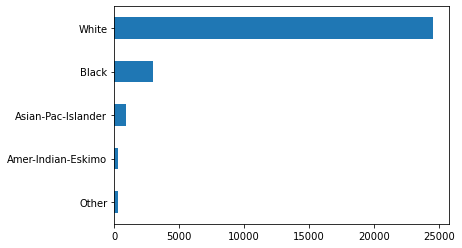

In [411]:
race_count.sort_values().plot.barh();

---
# What is the average age of men/women?
---

In [412]:
average_age_men = df.loc[df["sex"] == "Male", "age"].mean()
average_age_men

39.05829022452136

In [413]:
round(average_age_men,1)

39.1

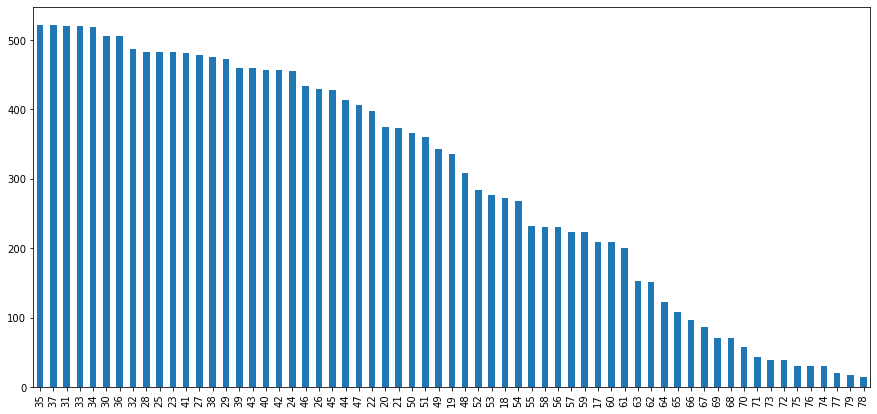

In [414]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Male", "age"].value_counts().plot.bar();

In [415]:
average_age_women = df.loc[df["sex"] == "Female", "age"].mean()
average_age_women 

36.54154418969234

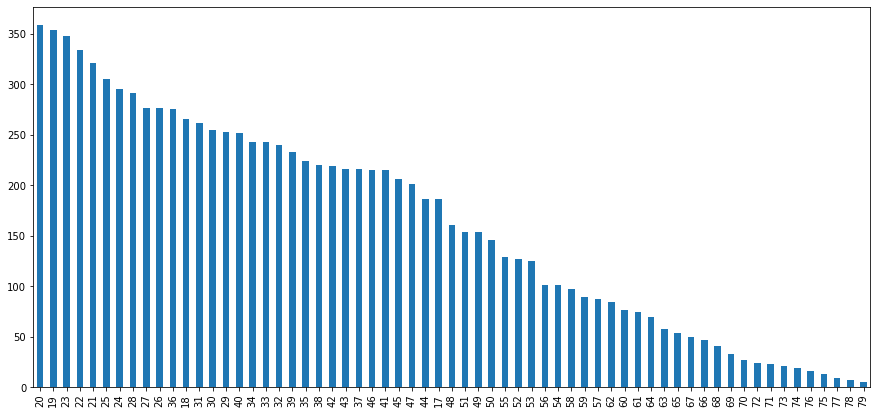

In [416]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Female", "age"].value_counts().plot.bar();

---
# What is the percentage of people who have a Bachelor's degree?
---

In [417]:
df["education"].value_counts()

HS-grad         9499
Some-college    6587
Bachelors       4623
Masters         1426
Assoc-voc       1227
11th            1099
Assoc-acdm       955
10th             859
7th-8th          573
9th              490
12th             412
Prof-school      401
5th-6th          309
Doctorate        299
1st-4th          150
Preschool         48
Name: education, dtype: int64

In [418]:
df["education"].value_counts().sum()

28957

In [419]:
len(df.loc[df["education"]=="Bachelors"])

4623

In [420]:
upper =  len(df.loc[df["education"]=="Bachelors"])

lower = df["education"].value_counts().sum()

percentage_bachelors = upper / lower * 100

percentage_bachelors

15.965051628276411

In [421]:
df["education"].value_counts(normalize=True)

HS-grad         0.328038
Some-college    0.227475
Bachelors       0.159651
Masters         0.049245
Assoc-voc       0.042373
11th            0.037953
Assoc-acdm      0.032980
10th            0.029665
7th-8th         0.019788
9th             0.016922
12th            0.014228
Prof-school     0.013848
5th-6th         0.010671
Doctorate       0.010326
1st-4th         0.005180
Preschool       0.001658
Name: education, dtype: float64

In [422]:
percentage_bachelors = df["education"].value_counts(normalize=True).loc["Bachelors"]*100
round(percentage_bachelors,1)

16.0

In [423]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.0


---
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [424]:
df.loc[df["education"]=="Bachelors,Masters,Doctorate"]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [425]:
df["salary"].value_counts()

<=50K    22582
>50K      6375
Name: salary, dtype: int64

In [426]:
df["education"].value_counts()

HS-grad         9499
Some-college    6587
Bachelors       4623
Masters         1426
Assoc-voc       1227
11th            1099
Assoc-acdm       955
10th             859
7th-8th          573
9th              490
12th             412
Prof-school      401
5th-6th          309
Doctorate        299
1st-4th          150
Preschool         48
Name: education, dtype: int64

In [427]:
df.tail()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [428]:
df["education"].isin(["Bachelors","Masters","Doctorate"])

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 28957, dtype: bool

In [429]:
df_high_edu = df[df["education"].isin(["Bachelors","Masters","Doctorate"])]
df_high_edu 

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,Unknown,287372,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K
32544,31,Private,199655,Masters,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,<=50K
32553,32,Private,116138,Masters,Never-married,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [430]:
df[(df["education"].isin(["Bachelors","Masters","Doctorate"]))&(df["salary"]==">50K")]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
25,56,Local-gov,216851,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32513,46,Private,42972,Masters,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,22,United-States,>50K
32533,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,Unknown,287372,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K


In [431]:
df[(df["education"].isin(["Bachelors","Masters","Doctorate"]))&(df["salary"]==">50K")]["salary"].value_counts()

>50K    2803
Name: salary, dtype: int64

In [432]:
count = len(df[(df["education"].isin(["Bachelors","Masters","Doctorate"]))&(df["salary"]==">50K")]["salary"])

In [433]:
perc_high_edu = (count / df["education"].count())

In [434]:
perc_high_edu

0.09679870152294782

In [435]:
perc_high_edu

0.09679870152294782

In [436]:
print(f"Percentage of people with advanced education make more than 50K : {round(perc_high_edu * 100, 2)}")

Percentage of people with advanced education make more than 50K : 9.68


---
# What percentage of people without advanced education make more than 50K?
---

In [437]:
lower_education = df[~df["education"].isin(["Bachelors","Masters","Doctorate"])]

In [438]:
df_low_edu =  df[~df["education"].isin(["Bachelors","Masters","Doctorate"])]
df_low_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
13,32,Private,205019,Assoc-acdm,Never-married,Sales,Unmarried,Black,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [439]:
df[~(df["education"].isin(["Bachelors","Masters","Doctorate"]))&(df["salary"]==">50K")]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Unknown,>50K
38,31,Private,84154,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,Unknown,>50K
55,43,Private,237993,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
67,53,Private,169846,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,110417,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32519,46,Private,364548,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [440]:
count = len(df[~(df["education"].isin(["Bachelors","Masters","Doctorate"]))&(df["salary"]==">50K")]["salary"])

In [441]:
count

3572

In [442]:
perc_low_edu = (count / df["education"].count())
perc_low_edu

0.12335531995717788

In [443]:
print(f"Percentage of people without advanced education make more than 50K : {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K : 12.34


In [444]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

Education has no clear effet on salary. You should investigate some other features also.


---
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
---

In [445]:
df["hours-per-week"].value_counts()

40    15191
50     2812
45     1822
35     1290
20     1207
30     1145
25      671
48      517
38      476
15      399
10      271
32      265
24      247
36      220
42      219
44      212
16      203
12      172
43      151
37      148
8       141
52      138
28       85
46       82
18       73
6        64
5        57
4        51
47       49
22       44
39       38
33       38
41       36
3        35
14       33
27       30
2        30
26       29
17       29
49       29
34       28
7        26
21       24
13       22
23       21
1        19
9        18
19       14
51       13
11       11
29        7
31        5
Name: hours-per-week, dtype: int64

In [446]:
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [447]:
lazy_riches = (df["hours-per-week"]==df["hours-per-week"].min()) & (df["salary"]==">50K")
lazy_riches


0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 28957, dtype: bool

In [448]:
df[(df["hours-per-week"]==df["hours-per-week"].min()) & (df["salary"]==">50K")]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
20072,65,Unknown,76043,HS-grad,Married-civ-spouse,Unknown,Husband,White,Male,0,0,1,United-States,>50K


In [449]:
num_lazy_riches = len(df[(df["hours-per-week"]==df["hours-per-week"].min()) & (df["salary"]==">50K")])
num_lazy_riches

2

In [450]:
num_min_workers = len(df[df["hours-per-week"]==df["hours-per-week"].min()])
num_min_workers

19

In [451]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {round(num_lazy_riches/num_min_workers*100)}")

Percentage of the people who work the minimum number of hours per week have a salary of >50K : % 11


 ---
 # What country has the highest percentage of people that earn >50K?
 ---


In [452]:
country_salary_df =df.groupby("native-country")[["salary"]].count()
country_salary_df

,salary
native-country,
Cambodia,19
Canada,102
China,71
Columbia,57
Cuba,88
Dominican-Republic,63
Ecuador,24
El-Salvador,103
England,76


In [453]:
df_new=df[df["salary"]==">50K"]
country_salary_df_riches = df_new.groupby('native-country')[["salary"]].count()
country_salary_df_riches

,salary
native-country,
Cambodia,7
Canada,30
China,19
Columbia,2
Cuba,20
Dominican-Republic,1
Ecuador,3
El-Salvador,7
England,24


In [454]:
rich_per_country =(df_new.groupby('native-country')[["salary"]].count())/(df.groupby("native-country")[["salary"]].count()).sort_values('salary',ascending=False)
rich_per_country

,salary
native-country,
Cambodia,0.368421
Canada,0.294118
China,0.267606
Columbia,0.035088
Cuba,0.227273
Dominican-Republic,0.015873
Ecuador,0.125000
El-Salvador,0.067961
England,0.315789


In [455]:
rich_per_country[rich_per_country.salary==rich_per_country.salary.max()]

,salary
native-country,
Iran,0.382353


In [ ]:
rich_per_country.loc[[rich_per_country.salary.idxmax()]]

In [456]:
rich_per_country.iloc[[0]]

,salary
native-country,
Iran,0.382353


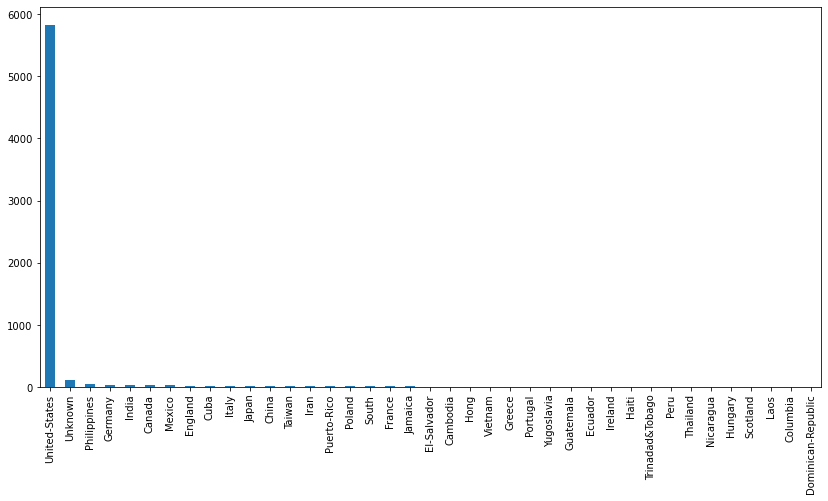

In [457]:
plt.figure(figsize=(14,7))
df.loc[df["salary"] == ">50K", "native-country"].value_counts().plot(kind="bar");

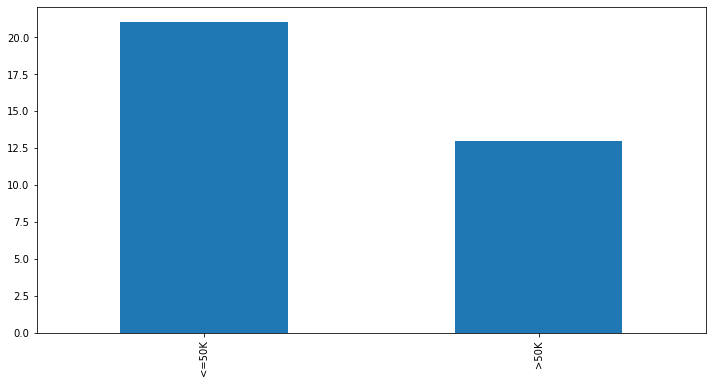

In [458]:
plt.figure(figsize=(12,6))
df.loc[((df["native-country"] == "Iran")), "salary"].value_counts().plot.bar();

---
# Identify the most popular occupation for those who earn >50K in India.
---

In [459]:

top_IN_occupation =(df["salary"]==">50K") & (df["native-country"]=="India")

top_IN_occupation

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 28957, dtype: bool

In [460]:
df[top_IN_occupation]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
968,48,Private,164966,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
1327,52,Private,168381,HS-grad,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,>50K
7285,54,State-gov,93449,Masters,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
8124,36,Private,172104,Prof-school,Never-married,Prof-specialty,Unmarried,Other,Male,0,0,40,India,>50K
9939,43,Federal-gov,325706,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,>50K
10590,35,Private,98283,Prof-school,Never-married,Prof-specialty,Unmarried,Asian-Pac-Islander,Male,0,0,40,India,>50K
10661,59,Private,122283,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,40,India,>50K
10736,30,Private,243190,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,>50K
11260,54,Private,225599,Masters,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,7298,0,40,India,>50K


In [461]:
df[top_IN_occupation]["occupation"].value_counts()

Prof-specialty      20
Exec-managerial      7
Tech-support         2
Sales                1
Adm-clerical         1
Transport-moving     1
Other-service        1
Name: occupation, dtype: int64

In [462]:
str(df[top_IN_occupation]["occupation"].mode())[5:19]

'Prof-specialty'

In [463]:
a =  str(df[top_IN_occupation]["occupation"].mode())[5:19]
a

'Prof-specialty'

In [464]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

Prof-specialty the most popular occupation for those who earn >50K in India.


----
---